In [1]:
import veloxchem as vlx
import py3Dmol as p3d

water_xyz = """3

O       0.0000000000     0.1187290000     0.0000000000
H      -0.7532010000    -0.4749160000    -0.0000000000
H       0.7532010000    -0.4749160000     0.0000000000
"""

molecule = vlx.Molecule.read_xyz_string(water_xyz)
molecule.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [2]:
print_results = """+--------------------------------------------------------------+
| adc2                                    singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0     0.3054352      8.311314   0.0142    0.9591   0.04089  |
|  1     0.3903211      10.62118   0.0000    0.9636   0.03637  |
+--------------------------------------------------------------+

+---------------------------------------------------+
| State   0 ,     0.3054352 au,      8.311314 eV    |
+---------------------------------------------------+
| HOMO          -> LUMO           a ->a      -0.691 |
| HOMO          -> LUMO+4         a ->a     +0.0451 |
| HOMO          -> LUMO+7         a ->a     +0.0227 |
| HOMO-2 HOMO   -> LUMO+1 LUMO    ab->ab    +0.0306 |
| HOMO   HOMO   -> LUMO   LUMO+3  ab->ab    -0.0253 |
| HOMO-2 HOMO   -> LUMO   LUMO+1  aa->aa    -0.0191 |
| HOMO-1 HOMO   -> LUMO   LUMO    ab->ab    -0.0191 |
| HOMO-3 HOMO   -> LUMO   LUMO    ab->ab    +0.0182 |
| HOMO-1 HOMO   -> LUMO   LUMO+4  aa->aa    -0.0174 |
| HOMO-1 HOMO   -> LUMO+4 LUMO    ab->ab    +0.0152 |
| HOMO-2 HOMO   -> LUMO+6 LUMO    ab->ab    -0.0152 |
| HOMO-1 HOMO   -> LUMO+5 LUMO    ab->ab    -0.0147 |
| HOMO-2 HOMO   -> LUMO   LUMO+6  aa->aa    +0.0139 |
| HOMO-1 HOMO   -> LUMO   LUMO+5  aa->aa    +0.0117 |
| HOMO-2 HOMO   -> LUMO   LUMO+1  ab->ab    +0.0115 |
| HOMO-3 HOMO   -> LUMO   LUMO+7  aa->aa    +0.0107 |

+---------------------------------------------------+
| State   1 ,     0.3903211 au,      10.62118 eV    |
+---------------------------------------------------+
| HOMO          -> LUMO+1         a ->a       +0.69 |
| HOMO          -> LUMO+6         a ->a     -0.0598 |
| HOMO          -> LUMO+2         a ->a     -0.0431 |
| HOMO-2 HOMO   -> LUMO+1 LUMO+1  ab->ab    -0.0301 |
| HOMO   HOMO   -> LUMO+1 LUMO+3  ab->ab    +0.0234 |
| HOMO-1 HOMO   -> LUMO   LUMO+1  ab->ab     +0.019 |
| HOMO-2 HOMO   -> LUMO+1 LUMO+6  aa->aa    -0.0189 |
| HOMO-1 HOMO   -> LUMO+4 LUMO+1  ab->ab    -0.0144 |
| HOMO-3 HOMO   -> LUMO   LUMO+1  ab->ab    -0.0143 |
| HOMO-1 HOMO   -> LUMO+1 LUMO+4  aa->aa    +0.0133 |
| HOMO-2 HOMO   -> LUMO+6 LUMO+1  ab->ab     +0.013 |
| HOMO-1 HOMO   -> LUMO+5 LUMO+1  ab->ab    +0.0121 |
| HOMO-1 HOMO   -> LUMO+1 LUMO+5  aa->aa    -0.0109 |
| HOMO-1 HOMO   -> LUMO   LUMO+1  aa->aa    +0.0104 |"""
print(print_results)

+--------------------------------------------------------------+
| adc2                                    singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0     0.3054352      8.311314   0.0142    0.9591   0.04089  |
|  1     0.3903211      10.62118   0.0000    0.9636   0.03637  |
+--------------------------------------------------------------+

+---------------------------------------------------+
| State   0 ,     0.3054352 au,      8.311314 eV    |
+---------------------------------------------------+
| HOMO          -> LUMO           a ->a      -0.691 |
| HOMO          -> LUMO+4         a ->a     +0.0451 |
| HOMO          -> LUMO+7         a ->a     +0.0227 |
| HOMO-2 HOMO   -> LUMO+1 LUMO    ab->ab    +0.0306 |
| HOMO   HOMO   -> LUMO   LUMO+3  ab->ab    -0.0253 |
| HOMO-2 HOMO   -> LUMO   LUMO+1  aa->aa    -0.

In [3]:
import veloxchem as vlx

water_mol_str = """
O       0.0000000000     0.1187290000     0.0000000000
H      -0.7532010000    -0.4749160000    -0.0000000000
H       0.7532010000    -0.4749160000     0.0000000000
"""

# Construct structure and basis objects
molecule = vlx.Molecule.read_str(water_mol_str)
basis = vlx.MolecularBasis.read(molecule, "6-31G", ostream=None)

# SCF settings and calculation
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_drv.xcfun = "b3lyp"
scf_drv.filename = "vlx_vis"
scf_results = scf_drv.compute(molecule, basis)

# resolve four eigenstates
rpa_solver = vlx.lreigensolver.LinearResponseEigenSolver()
rpa_solver.nstates = 2
rpa_solver.nto = True
rpa_solver.nto_cubes = False
rpa_results = rpa_solver.compute(molecule, basis, scf_results)

                                                                                                                          
                                            Linear Response EigenSolver Setup                                             
                                                                                                                          
                               Number of States                : 2                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                               Exchange-Correlation Functional : B3LYP                                                    
                

* Info * Using the B3LYP functional.                                                                                      
                                                                                                                          
         P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
                                                                                                                          
* Info * Using the Libxc library (v7.0.0).                                                                                
                                                                                                                          
         S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
                                                                                                                          
* Info * Using the following algorithm for XC numer

* Info * Molecular grid with 40750 points generated in 0.03 sec.                                                          
                                                                                                                          
* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 2 gerade trial vectors in reduced space                                                                          
* Info * 2 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 4.38 kB of memory used for subspace procedure on the master node                                                 
* Info * 2.30 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 4.02e-01 and 8.64e-02                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 4 gerade trial vectors in reduced space                                                                          
* Info * 4 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 6.94 kB of memory used for subspace procedure on the master node                                                 
* Info * 2.30 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 4.90e-02 and 5.93e-03                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 6 gerade trial vectors in reduced space                                                                          
* Info * 6 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 9.50 kB of memory used for subspace procedure on the master node                                                 
* Info * 2.30 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 5.13e-03 and 2.28e-04                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 8 gerade trial vectors in reduced space                                                                          
* Info * 8 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 12.22 kB of memory used for subspace procedure on the master node                                                
* Info * 2.30 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 2.74e-04 and 4.19e-06                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 9 gerade trial vectors in reduced space                                                                          
* Info * 9 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 13.34 kB of memory used for subspace procedure on the master node                                                
* Info * 2.30 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 2.09e-05 and 4.19e-06                                            
                

* Info * Checkpoint written to file: vlx_vis_rsp.h5                                                                       
                                                                                                                          
* Info * Time spent in writing checkpoint file: 0.01 sec                                                                  
                                                                                                                          
               *** Linear response converged in 5 iterations. Time: 0.32 sec                                              
                                                                                                                          
                                                                                                                          


* Info * Running NTO analysis for S1...                                                                                   


* Info * Running NTO analysis for S2...                                                                                   


* Info * Response solution vectors written to file: vlx_vis.h5                                                            
                                                                                                                          
               Electric Transition Dipole Moments (dipole length, a.u.)                                                   
               --------------------------------------------------------                                                   
                                                X            Y            Z                                               
               Excited State    S1:      0.000000    -0.000000    -0.245590                                               
               Excited State    S2:      0.000000     0.634304     0.000000                                               
                                                                                                                          


               Electric Transition Dipole Moments (dipole velocity, a.u.)                                                 
               ----------------------------------------------------------                                                 
                                                X            Y            Z                                               
               Excited State    S1:     -0.000000     0.000000    -0.458302                                               
               Excited State    S2:      0.000000     0.838809     0.000000                                               
                                                                                                                          


               Magnetic Transition Dipole Moments (a.u.)                                                                  
               -----------------------------------------                                                                  
                                                X            Y            Z                                               
               Excited State    S1:      0.119481    -0.000000    -0.000000                                               
               Excited State    S2:      0.000000    -0.000000    -0.000000                                               
                                                                                                                          


               One-Photon Absorption                                                                                      
               ---------------------                                                                                      
               Excited State    S1:      0.28698904 a.u.      7.80937 eV    Osc.Str.    0.0115                            
               Excited State    S2:      0.36613565 a.u.      9.96306 eV    Osc.Str.    0.0982                            
                                                                                                                          


               Electronic Circular Dichroism                                                                              
               -----------------------------                                                                              
               Excited State    S1:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S2:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
                                                                                                                          


               Character of excitations:                                                                                  
                                                                                                                          
               Excited state 1                                                                                            
               ---------------                                                                                            
               HOMO     -> LUMO         1.0001                                                                            
                                                                                                                          
               Excited state 2                                                                                            
               ---------------                                                                                            
               H

In [4]:
viewer = vlx.OrbitalViewer()
viewer.plot(molecule, basis, "vlx_vis.h5", "rsp/NTO_S1")

Output()

Dropdown(description='Orbital:', index=4, options=(('  1 occ=-0.000 ene=0.000  (alpha HOMO-4)', 0), ('  2 occ=…

In [5]:
from valet import transition_analysis_utils as tau
import veloxchem as vlx

# Construct the dimer 
c2h4_xyz = """ 
C        0.6655087212      0.0000000000     -x
C       -0.6655087212      0.0000000000     -x
H        1.2112231877      0.9379948213     -x
H        1.2112231877     -0.9379948213     -x
H       -1.2112231877      0.9379948213     -x
H       -1.2112231877     -0.9379948213     -x
"""

c2f4_str = """
C        0.6665934397      0.0000000000      x                 
C       -0.6665934397     -0.0000000000      x                 
F        1.3499511337      1.1743643195      x                 
F        1.3499511337     -1.1743643195      x                 
F       -1.3499511337      1.1743643195      x                
F       -1.3499511337     -1.1743643195      x   
"""

dist = 2 # We will set the interatomic distance to 4 Angstrom
dist_str = "%.10f" % dist

dimer_xyz = "12\n\n"

for line in c2h4_xyz.split("\n"):
    new = line.replace('x', dist_str)
    if 'x' in line:
        dimer_xyz += new + "\n" 

for line in c2f4_str.split("\n"):
    new = line.replace('x', dist_str)
    if 'x' in line:
        dimer_xyz += new + "\n" 

print(dimer_xyz)

molecule = vlx.Molecule.from_xyz_string(dimer_xyz)
basis_label = "6-31G*"
basis = vlx.MolecularBasis.read(molecule, basis_label, ostream=None)

12

C        0.6655087212      0.0000000000     -2.0000000000
C       -0.6655087212      0.0000000000     -2.0000000000
H        1.2112231877      0.9379948213     -2.0000000000
H        1.2112231877     -0.9379948213     -2.0000000000
H       -1.2112231877      0.9379948213     -2.0000000000
H       -1.2112231877     -0.9379948213     -2.0000000000
C        0.6665934397      0.0000000000      2.0000000000                 
C       -0.6665934397     -0.0000000000      2.0000000000                 
F        1.3499511337      1.1743643195      2.0000000000                 
F        1.3499511337     -1.1743643195      2.0000000000                 
F       -1.3499511337      1.1743643195      2.0000000000                
F       -1.3499511337     -1.1743643195      2.0000000000   



In [6]:
viewer = p3d.view(width=500, height=300)
viewer.addModel(dimer_xyz, 'xyz')
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick":{},"sphere": {"scale":0.25}})
viewer.rotate(90,'x')
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
# Run a much smaller basis set and fewer excited state in the background...
molecule = vlx.Molecule.from_xyz_string(dimer_xyz)
basis_label = "STO-3G"
basis = vlx.MolecularBasis.read(molecule, basis_label, ostream=None)

method_dict = {'xcfun':'b3lyp'}
scf_dict = {}

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_drv.update_settings(scf_dict={}, method_dict=method_dict)
scf_results = scf_drv.compute(molecule, basis)

# We now run the excited states calculation and save the attachment and 
# detachment densities in cube files
rsp_dict = {'detach_attach':'no', 'nstates':2}
rsp_drv = vlx.lreigensolver.LinearResponseEigenSolver()
rsp_drv.update_settings(rsp_dict=rsp_dict, method_dict=method_dict)
rsp_results = rsp_drv.compute(molecule, basis, scf_results)

                                                                                                                          
                                            Linear Response EigenSolver Setup                                             
                                                                                                                          
                               Number of States                : 2                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                               Exchange-Correlation Functional : B3LYP                                                    
                

* Info * Using the B3LYP functional.                                                                                      
                                                                                                                          
         P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
                                                                                                                          
* Info * Using the Libxc library (v7.0.0).                                                                                
                                                                                                                          
         S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
                                                                                                                          
* Info * Using the following algorithm for XC numer

* Info * Molecular grid with 183794 points generated in 0.22 sec.                                                         
                                                                                                                          
* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 2 gerade trial vectors in reduced space                                                                          
* Info * 2 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 37.40 kB of memory used for subspace procedure on the master node                                                
* Info * 2.49 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 3.89e-01 and 2.50e-02                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 4 gerade trial vectors in reduced space                                                                          
* Info * 4 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 61.98 kB of memory used for subspace procedure on the master node                                                
* Info * 2.48 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 3.11e-01 and 5.93e-03                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 6 gerade trial vectors in reduced space                                                                          
* Info * 6 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 86.55 kB of memory used for subspace procedure on the master node                                                
* Info * 2.48 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 7.13e-02 and 5.61e-04                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 8 gerade trial vectors in reduced space                                                                          
* Info * 8 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 111.13 kB of memory used for subspace procedure on the master node                                               
* Info * 2.48 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 1.33e-02 and 1.18e-04                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 10 gerade trial vectors in reduced space                                                                         
* Info * 10 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 135.86 kB of memory used for subspace procedure on the master node                                               
* Info * 2.47 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 4.38e-03 and 1.37e-05                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 11 gerade trial vectors in reduced space                                                                         
* Info * 11 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 148.15 kB of memory used for subspace procedure on the master node                                               
* Info * 2.47 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   6 * Residuals (Max,Min): 6.32e-04 and 6.87e-06                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 12 gerade trial vectors in reduced space                                                                         
* Info * 12 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 160.44 kB of memory used for subspace procedure on the master node                                               
* Info * 2.46 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   7 * Residuals (Max,Min): 4.45e-04 and 6.56e-06                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 13 gerade trial vectors in reduced space                                                                         
* Info * 13 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 172.73 kB of memory used for subspace procedure on the master node                                               
* Info * 2.47 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   8 * Residuals (Max,Min): 2.08e-04 and 6.47e-06                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 14 gerade trial vectors in reduced space                                                                         
* Info * 14 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 184.86 kB of memory used for subspace procedure on the master node                                               
* Info * 2.47 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   9 * Residuals (Max,Min): 6.84e-05 and 6.40e-06                                            
                

               *** Linear response converged in 9 iterations. Time: 4.42 sec                                              
                                                                                                                          
                                                                                                                          


               Electric Transition Dipole Moments (dipole length, a.u.)                                                   
               --------------------------------------------------------                                                   
                                                X            Y            Z                                               
               Excited State    S1:     -0.015057    -0.000000     0.000000                                               
               Excited State    S2:     -1.197803    -0.000000     0.000000                                               
                                                                                                                          


               Electric Transition Dipole Moments (dipole velocity, a.u.)                                                 
               ----------------------------------------------------------                                                 
                                                X            Y            Z                                               
               Excited State    S1:      0.001785    -0.000000     0.000000                                               
               Excited State    S2:     -0.530015    -0.000000    -0.000000                                               
                                                                                                                          


               Magnetic Transition Dipole Moments (a.u.)                                                                  
               -----------------------------------------                                                                  
                                                X            Y            Z                                               
               Excited State    S1:      0.000000    -0.021165    -0.000000                                               
               Excited State    S2:      0.000000    -0.349244    -0.000000                                               
                                                                                                                          


               One-Photon Absorption                                                                                      
               ---------------------                                                                                      
               Excited State    S1:      0.20116982 a.u.      5.47411 eV    Osc.Str.    0.0000                            
               Excited State    S2:      0.29398212 a.u.      7.99966 eV    Osc.Str.    0.2812                            
                                                                                                                          


               Electronic Circular Dichroism                                                                              
               -----------------------------                                                                              
               Excited State    S1:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S2:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
                                                                                                                          


               Character of excitations:                                                                                  
                                                                                                                          
               Excited state 1                                                                                            
               ---------------                                                                                            
               HOMO     -> LUMO        -0.9985                                                                            
                                                                                                                          
               Excited state 2                                                                                            
               ---------------                                                                                            
               H

In [8]:
# Now we can analyze the densities.
# First, we have to define the subgroups. One subgroup will consist of the ethene molecule, while the other will consist of the tetrafluoroethene.
subgroup_name = ["E", "TFE"]
natm = molecule.number_of_atoms()
atom_subgroup_map = [-1] * natm
atom_subgroup_map[:6] = [0] * 6 # The first 6 atoms belong to ethene, subgroup 0
atom_subgroup_map[6:] = [1] * (natm-6) # The next 6 atoms belong to tetrafluoroethene, subgroup 1
print(atom_subgroup_map)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [9]:
def plot_transition_diagram(state_index, file_name, subgroup_name, atom_subgroup_map):

    folder = "../../data/vis/" # Path to where the cube files were saved
    
    density_type_plus = "detach" # or hole
    density_type_minus = "attach" # or electron/particle

    hole_cube = "%s_S%d_%s.cube" % (folder+file_name, state_index, density_type_plus)
    particle_cube = "%s_S%d_%s.cube" % (folder+file_name, state_index, density_type_minus)

    # We have to load the detachment and attachment densities and compute the atomic charges
    transition = tau.load_transition(hole_cube, particle_cube)
    segment_array = tau.compute_atomic_charges([transition])
    
    subgroup_info = tau.SubgroupInfo()

    # Determine subgroup charges
    subgroup_info.set_subgroups(subgroup_name, atom_subgroup_map)
    tau.compute_subgroup_charges(transition, subgroup_info)

    parts = file_name.split('_')
    
    diagram_title = "%s %s, S%d" % (parts[0], parts[1], state_index)

    tau.create_diagram(subgroup_info, title=diagram_title,
                      save_plot=False)

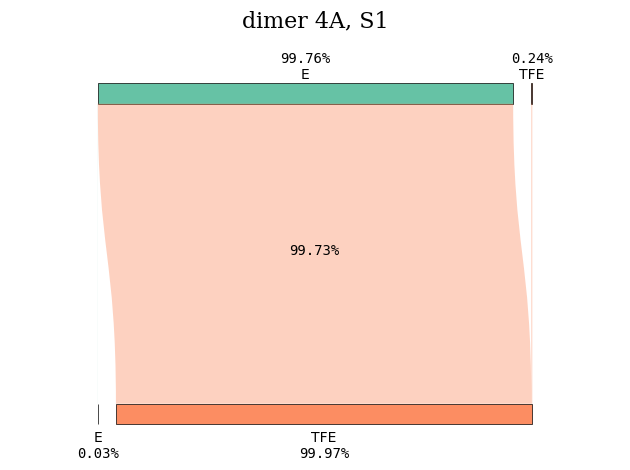

In [10]:
plot_transition_diagram(1, 'dimer_4A', subgroup_name, atom_subgroup_map)

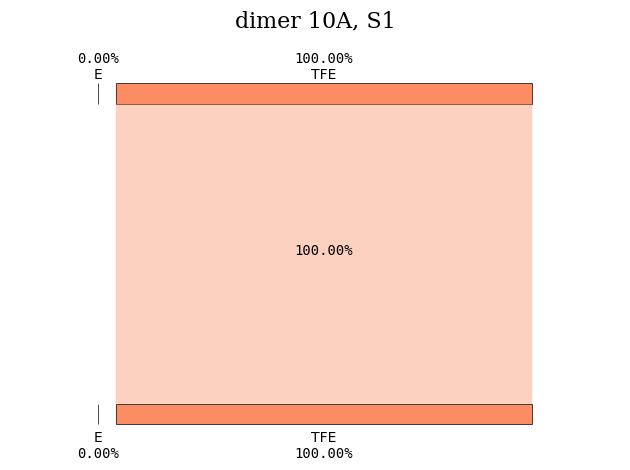

In [11]:
plot_transition_diagram(1, 'dimer_10A', subgroup_name, atom_subgroup_map)

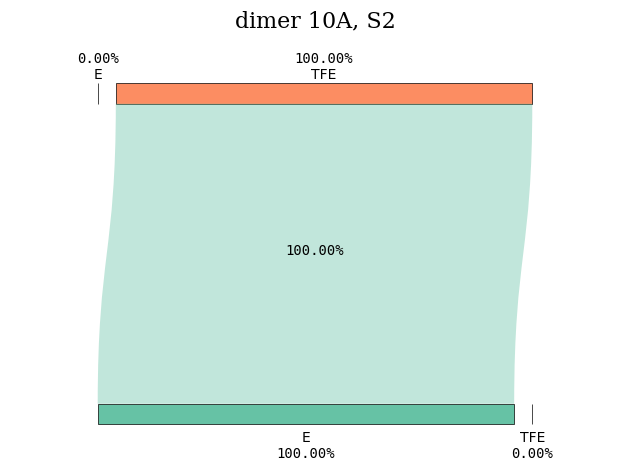

In [12]:
plot_transition_diagram(2, 'dimer_10A', subgroup_name, atom_subgroup_map)